In [1]:
#Importação do pacote pandas para tratar os dados
import pandas as pd

In [2]:
#Carregando o Arquivo csv e transformando em um dataframe e exibindo-o
df = pd.read_csv('telecom_users.csv')
df.head()

,Unnamed: 0,IDCliente,Genero,Aposentado,Casado,Dependentes,MesesComoCliente,ServicoTelefone,MultiplasLinhas,ServicoInternet,...,ServicoSuporteTecnico,ServicoStreamingTV,ServicoFilmes,TipoContrato,FaturaDigital,FormaPagamento,ValorMensal,TotalGasto,Churn,Codigo
0,1869,7010-BRBUU,Masculino,0,Sim,Sim,72,Sim,Sim,Nao,...,SemInternet,SemInternet,SemInternet,2 anos,Nao,CartaoCredito,24.10,1734.65,Nao,NaN
1,4528,9688-YGXVR,Feminino,0,Nao,Nao,44,Sim,Nao,Fibra,...,Nao,Sim,Nao,Mensal,Sim,CartaoCredito,88.15,3973.2,Nao,NaN
2,6344,9286-DOJGF,Feminino,1,Sim,Nao,38,Sim,Sim,Fibra,...,Nao,Nao,Nao,Mensal,Sim,DebitoAutomatico,74.95,2869.85,Sim,NaN
3,6739,6994-KERXL,Masculino,0,Nao,Nao,4,Sim,Nao,DSL,...,Nao,Nao,Sim,Mensal,Sim,BoletoEletronico,55.90,238.5,Nao,NaN
4,432,2181-UAESM,Masculino,0,Nao,Nao,2,Sim,Nao,DSL,...,Nao,Nao,Nao,Mensal,Nao,BoletoEletronico,53.45,119.5,Nao,NaN


In [3]:
# Deletando as colunas desnecessárias através do método drop do dataframe
df = df.drop(labels=['Unnamed: 0', 'IDCliente', 'Codigo'], axis=1)

In [4]:
#Transformando as variáveis categoricas do tipo texto em númerico

#Masculino, sim, fibra, anual e boleto eletronico será 1
df = df.replace(['Masculino','Sim', 'Fibra', 'Anual', 'BoletoEletronico'], 1)

#Feminino, não, sem internet, sem telefone, mensal e boleto impresso será 0
df = df.replace(['Feminino','Nao','SemInternet', 'SemTelefone', 'Mensal', 'BoletoImpresso'], 0)

#Dsl, 2 anos, debito automatico será 2
df = df.replace(['DSL', '2 anos', 'DebitoAutomatico'],2)

#cartao de credito será 3
df = df.replace('CartaoCredito',3)

In [5]:
#Substituindo o espaço com nada
df = df.replace(' ',)

#Excluindo as linhas que contém algum valor nulo
df = df.dropna(axis=0, how='any')

#Transformando a coluna total gasto para número
df['TotalGasto'] = pd.to_numeric(df['TotalGasto'])

In [6]:
#Verificando se ainda tem algum valor nulo
df.count().isnull()

Genero                    False
Aposentado                False
Casado                    False
Dependentes               False
MesesComoCliente          False
ServicoTelefone           False
MultiplasLinhas           False
ServicoInternet           False
ServicoSegurancaOnline    False
ServicoBackupOnline       False
ProtecaoEquipamento       False
ServicoSuporteTecnico     False
ServicoStreamingTV        False
ServicoFilmes             False
TipoContrato              False
FaturaDigital             False
FormaPagamento            False
ValorMensal               False
TotalGasto                False
Churn                     False
dtype: bool

In [7]:
#Importando o pacote do sklearn para treinar o modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [8]:
#Instaciando o pacote a variavel
modelo = DecisionTreeClassifier()

In [9]:
#Defindo os dados de x e y, x vai ser todas as colunas menos a "Churn", e y será a coluna "Churn"
x = df.drop('Churn', axis=1)
y = df['Churn']

In [10]:
#Dividindo os dados em treino e teste através do método train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [11]:
#Treinando o modelo com os dados de treino
modelo.fit(x_train,y_train)

DecisionTreeClassifier()

In [12]:
#Testando o modelo passando os dados de teste, e atribuindo as previsões a variavel previsao
Previsao = modelo.predict(x_test)

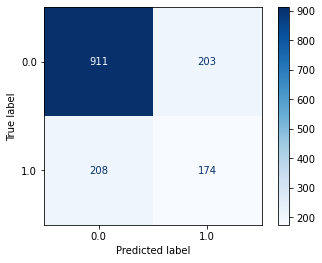

In [13]:
#Importando a função para verificar visualizar os dados e as previsão do modelo
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(modelo, x_test, y_test, cmap='Blues')

####    No eixo x temos os dados da previsão do modelo, e no y os dados de teste
####    O modelo preveu que 1119 pessoas nao iria cancelar o serviço, e segundo os dados, 1114 não cancelou
####    o serviço
####    o modelo preveu que 377 pessoas iria cancelar o serviço, e segundo os dados, 382 cancelou o serviço

In [16]:
#Importando a função pra verificar acurácia do modelo
from sklearn.metrics import accuracy_score

#Passando para a função o dados de y_teste"O que realmente aconteceu" e o dados previsto pelo modelo
accuracy_score(y_test,Previsao)

0.7252673796791443

#### Obteve-se uma precisão de 72%